In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import linregress

In [97]:
df = pd.read_csv('epa-sea-level.csv')
print(df.head())

   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


In [99]:
df = df.dropna(subset=["CSIRO Adjusted Sea Level"])

In [101]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


Slope :  0.0628765374624721 
Intercept :  -118.74277636667209
Predicted sea level in 2050 is :  10.154125431395713  meters


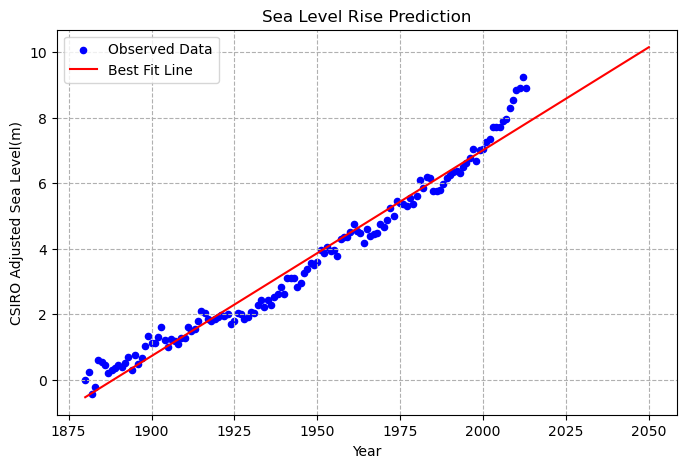

In [145]:
plt.figure(figsize=(8,5))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label="Observed Data", color='blue', s=20)

slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
print("Slope : ",slope, "\nIntercept : ", intercept)

# Generate future predictions till 2050
years = np.arange(df['Year'].min(), 2051)
predicted_sea_levels = slope*years + intercept      # mx+c 

# plot the line of best fit
plt.plot(years, predicted_sea_levels, color='red', label='Best Fit Line')

# Predicted sea level for 2050
sea_level_50 = slope*2050 + intercept
print('Predicted sea level in 2050 is : ', (sea_level_50), " meters")

plt.title('Sea Level Rise Prediction')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level(m)')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

Predicted sea level in 2050 is :  15.11179370257696  inches


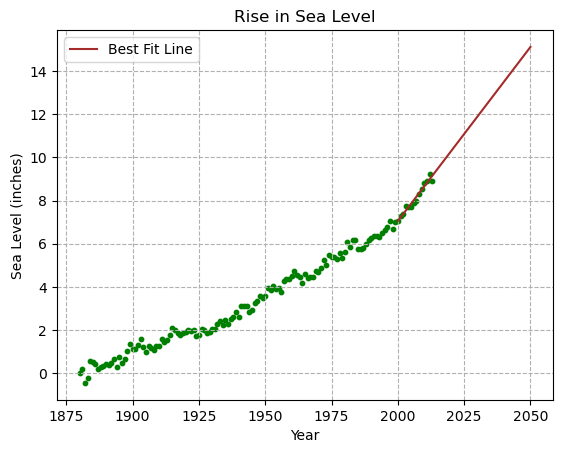

In [169]:
df_recent = df[df['Year']> 2000]

plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='', color='green', s=10)

slope, intercept, r_value, p_value, std_err = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level']) 
years2 = np.arange(2000, 2051)
predicted_sea_levels2 = slope*years2 + intercept

plt.plot(years2, predicted_sea_levels2, label='Best Fit Line', color='brown')

# Predicted sea level for 2050
sea_level = slope*2050 + intercept
print('Predicted sea level in 2050 is : ', sea_level, " inches")

plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()